# VLE of glassy polymers

This is an example for a VLE calculation featuring a polymer and a solvent. PC-SAFT calculation for a water sorption isotherm of the polymer PVP were performed (the dotted line in Figure 2 of https://doi.org/10.3390/membranes12040434). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,convert
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

The the first part of the code is basically the same as presented in VLE_Water_Sorption_Polymer_part1.ipynb

In [2]:
mi=np.asarray([1.20469,1045.99])
sigi=np.asarray([2.797059952,2.71])
ui=np.asarray([353.95,205.599])
epsAiBi=np.asarray([2425.67,0.])
kapi=np.asarray([0.04509,0.02])
N=np.asarray([1.,231.])
Mi=np.asarray([18.015,25700.])
kij=np.asarray([[0,-0.128],[-0.128,0]])

In [3]:
ksw = 0.4279 #/ 0.03166**2
v0p = Mi[1]/1506.704837/1000.

In [4]:
T=298.15
p=1E5
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kapi,N)
npoint=100
w1=np.linspace(0,1,npoint)
w2=1-w1
wi=np.vstack((w1,w2))
xi=convert(wi,1/Mi)
lngammai=np.asarray([lngi(T,wi[:,i],mi,sigi,ui,epsAiBi,kapi,N,vpures,Mi,kij).flatten() for i,val in enumerate(wi[0,:])])

In [18]:
def NETVLE(RH,ww):
    wi=np.asarray([ww,1-ww])
    xi=convert(wi,1./Mi)
    xw=xi[0]
    vmol=v0p/(1-ksw*RH**2)*(1-xw)
    return lngi(T,wi,mi,sigi,ui,epsAiBi,kapi,N,vpures,Mi,kij=kij,vmol=vmol,NETGP=True)[0]+np.log(ww)

RHvec=[]
wnet=np.linspace(0.01,0.4,npoint)
for i,val in enumerate(wnet):
    res=lambda RH : np.exp(NETVLE(RH,val))-RH
    RHvec.append(root(res,val,method='broyden1')["x"])
RHvec=np.asarray(RHvec)

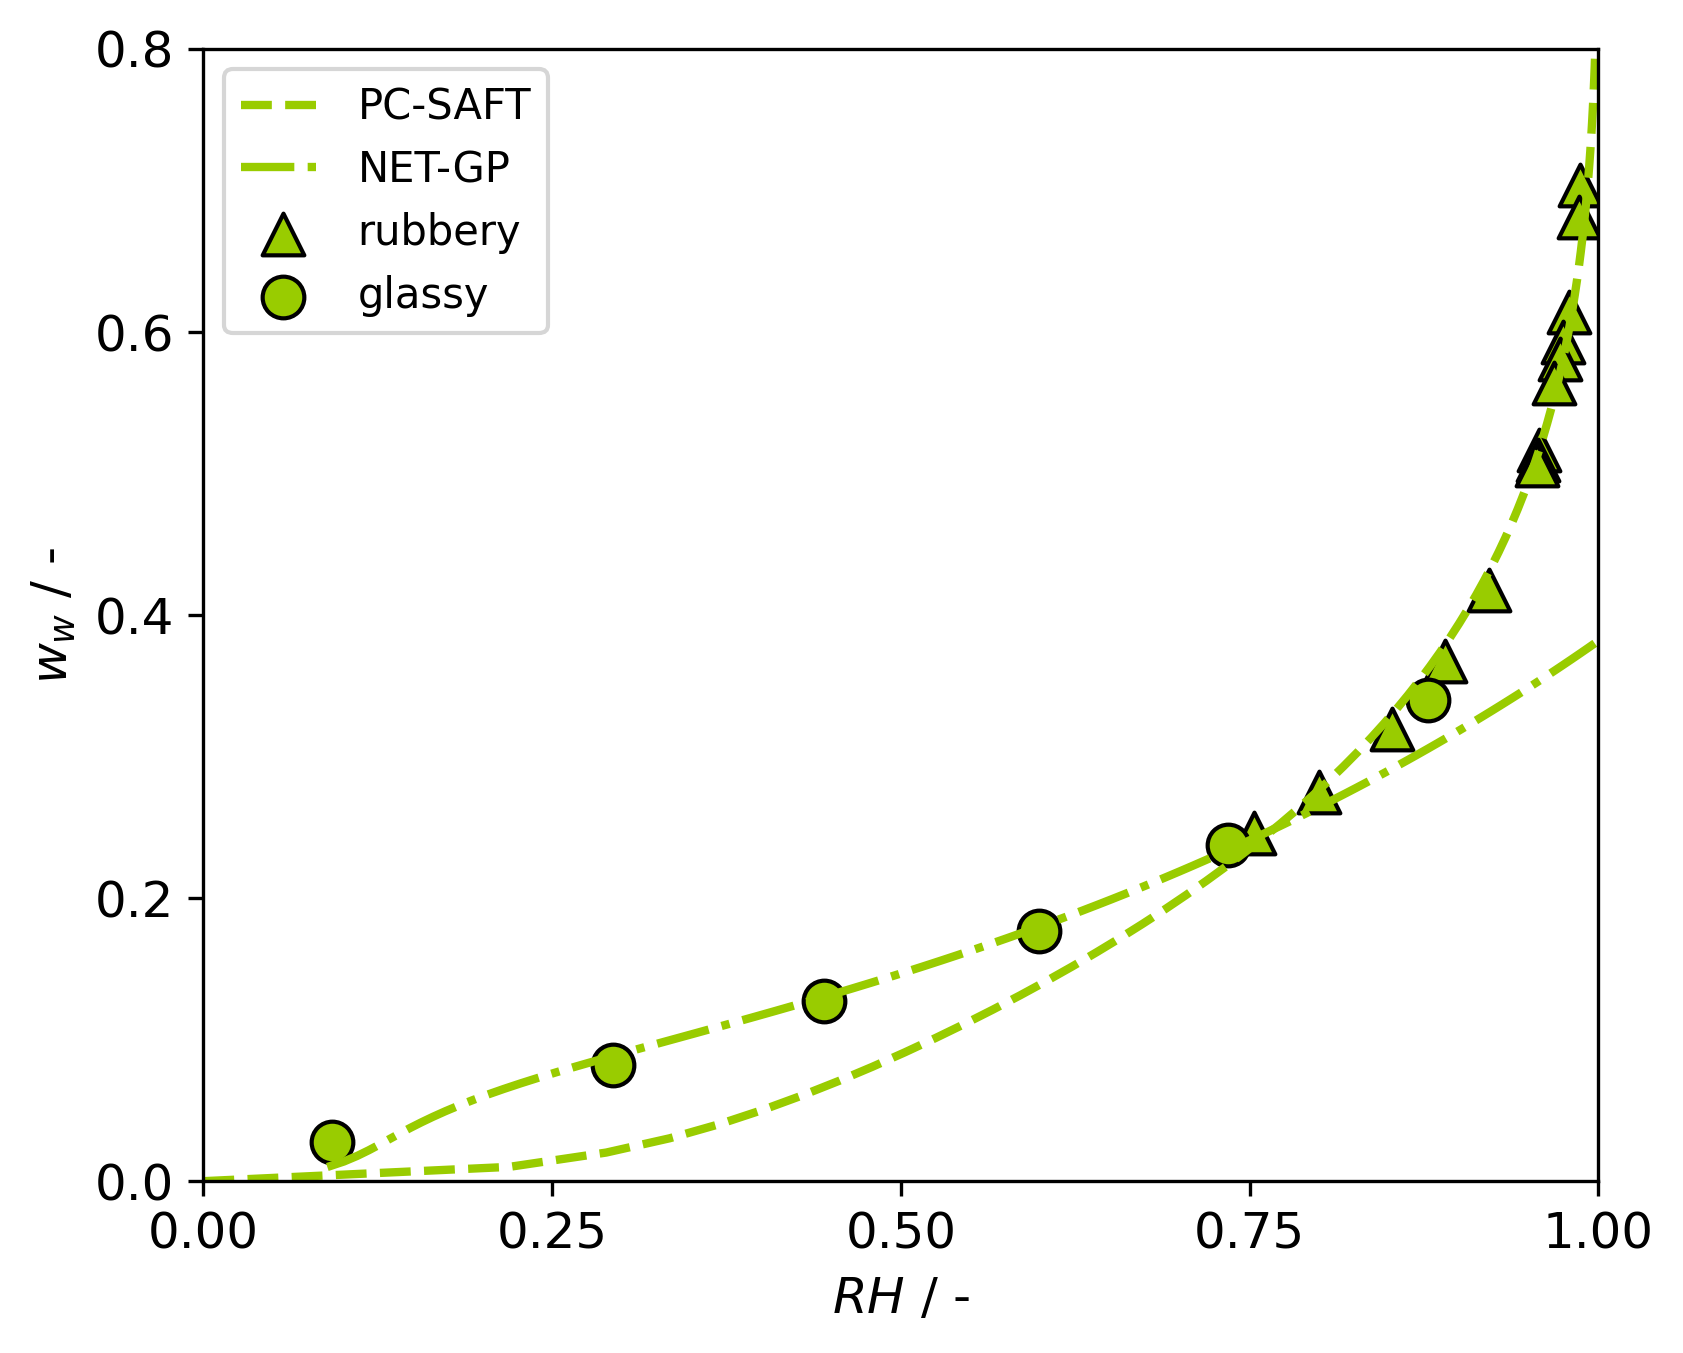

In [17]:


font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

colorVLE = "#99CC00"

fig, ax = plt.subplots(figsize = (6, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

RHexp = [0.9868,0.9858,0.9787,0.9749,0.9724,0.9685,0.9576,0.9565,0.9563,0.9217,0.89,0.8519,0.7998,0.7529]
wexp = [0.704,0.6808,0.6142,0.593,0.5808,0.5638,0.5162,0.5096,0.506,0.4175,0.3672,0.3193,0.275,0.246]

RHexp2 = [0.0924,0.2939,0.4449,0.599,0.7344,0.8781]
wexp2 = [0.0274269,0.0821512,0.1275743,0.1764984,0.237775,0.3401576]


w1vecnet=np.asarray([0,0.01010101,0.03030303,0.05050505050505051,0.07070707,0.08080808,0.1010101,0.15151515,0.2020202,0.2525252,0.29292929,0.32323232,0.35353535,0.36363636,0.37373737 ])

RHvecnet=np.asarray([0,0.08918283177229723,0.13443607581986078,0.1760292767458166,0.23249529616442166,0.2672469998598751,0.339728603928366,0.5152843958145663,0.6584131146365886,0.7752373315670975,0.8549372175803867,0.9084896086230553,0.957630227423256,0.9732295774807403,0.9882587661995547])


ax.plot(np.exp(lngammai[:,0]+np.log(w1)),w1, "--",color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(RHvec,wnet, "-.",color = colorVLE , 
        linewidth = 2.0, label = "NET-GP")
# ax.plot(RHvec[RHvec<RHvecnet],w1vec[RHvec<RHvecnet], "-",color = colorVLE , 
#         linewidth = 2.0, label = "PC-SAFT+NET-GP")
# ax.plot(RHvecnet[RHvec>RHvecnet],w1vecnet[RHvec>RHvecnet], "-",color = colorVLE , 
#         linewidth = 2.0)


ax.scatter(RHexp, wexp, s = 100, c = colorVLE, marker="^", 
            linewidth=1.0, edgecolor='k', label = "rubbery")
ax.scatter(RHexp2, wexp2, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "glassy")



ax.legend(fontsize="small")
ax.set_ylabel('$w_w$ / -')
ax.set_xlabel('$RH$ / -')
ax.axis([0, 1., 0, 0.8])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()